In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [96]:
with open('teste2_1d_2k') as f:
    lines = f.readlines()

In [100]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[0], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[1].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[0], dtype=float, sep=' '))
    else:
        print(medida[1].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

2484 2478 2443 2386 2318 2320 2331 2304 2229 2235 2215 2155 2184 2088 2137 2058 2075 2020 1958 1980 1952 1914 1856 1864 1822 1800 1797 1774 1711 1664 1677 1641 1569 1612 1548 1514 1507 1453 1431 1452 1394 1392 1320 1311 1275 1251 1247 1217 1190 1163 1133 1116 1093 1065 1051 1032 1000 974 956 943 923 903 884 846 851 821 799 783 761 758 737 728 717 671 669 656 646 628 624 621 613 579 567 569 575 552 548 549 537 533 508 498 515 507 508 514 502 493 498 497 490 487 503 489 487 498 496 511 512 503 521 523 532 538 561 574 558 592 589 599 609 613 635 643 670 664 689 708 710 741 744 764 778 806 819 845 868 864 898 908 931 952 968 1001 1007 1033 1072 1074 1111 1129 1171 1190 1206 1240 1251 1287 1300 1341 1346 1405 1431 1440 1462 1500 1522 1538 1565 1598 1624 1652 1679 1710 1742 1765 1787 1812 1856 1872 1905 1945 1961 1991 2036 2029 2067 2092 2113 2146 2171 2211 2234 2251 2282 2307 2334 2345 2367 2404 2447 2478 2481 2481 2521 2514 2542 2586 2639 2660 2628 2675 2717 2683 2760 2742 2765 2804 2808 2

/tmp/ipykernel_6414/3401684603.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  dados_linha = np.fromstring(medida[0], dtype=int, sep=' ')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

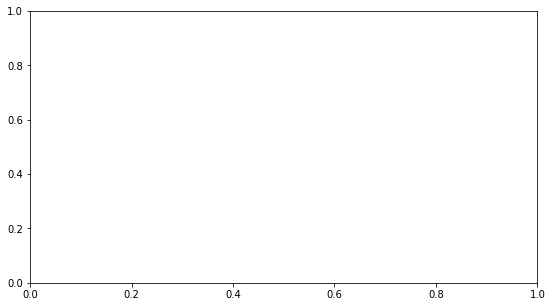

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [75]:
dados.shape

(0,)

In [76]:
limite=6000
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[0,:limite]*k,'b-')
plt.plot(dados[120,:limite]*k,'r-')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 2160x360 with 0 Axes>

In [77]:
limite=200
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[0,:limite]*k,'b-')
plt.plot(dados[101,:limite]*k,'r-')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 2160x360 with 0 Axes>

In [78]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [79]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [80]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

In [81]:
npontos = 300
ffty, df = print_fft(dados[80,:npontos]*k,600000)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [50]:
npontos = 1500
ffty, df = print_fft(dados[80,:npontos]*k,600000)

IndexError: index 80 is out of bounds for axis 0 with size 1

In [51]:
frequencia = 198180
sample_freq = 600000
npontos_range = range(300,6000,100)
componentes = [componente_precisa(dados[80,:npontos]*k,frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

IndexError: index 80 is out of bounds for axis 0 with size 1

In [52]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

NameError: name 'componentes' is not defined

In [53]:
frequencia = 198180
sample_freq = 600000
npontos = 300
inicio_range = range(0,6000-npontos-1,100)
componentes = [componente_precisa(dados[80,inicio:inicio+npontos]*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

IndexError: index 80 is out of bounds for axis 0 with size 1

In [54]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

NameError: name 'componentes' is not defined

In [55]:
frequencia_range = range(198000,199000,100)
sample_freq = 600000
npontos = 300
componentes = [componente_precisa(dados[80,:npontos]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range]

IndexError: index 80 is out of bounds for axis 0 with size 1

In [56]:
frequencia_range2 = range(198000,199000,10)
sample_freq = 600000
npontos2 = 6000
componentes2 = [componente_precisa(dados[80,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]

IndexError: index 80 is out of bounds for axis 0 with size 1

In [57]:
frequencia_range3 = range(198000,199000,10)
sample_freq = 600000
npontos3 = 1500
componentes3 = [componente_precisa(dados[80,:npontos3]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range3]

IndexError: index 80 is out of bounds for axis 0 with size 1

In [58]:
frequencia_range4 = range(198000,199000,10)
sample_freq = 600000
npontos4 = 600
componentes4 = [componente_precisa(dados[80,:npontos4]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range4]

IndexError: index 80 is out of bounds for axis 0 with size 1

In [59]:
plt.figure(figsize=(30,5))
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.plot(frequencia_range4,componentes4,'mx-',label=f'{npontos4} pontos')
plt.plot(frequencia_range3,componentes3,'gx-',label=f'{npontos3} pontos')
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.xlabel(f'Amplitude')
plt.ylabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

NameError: name 'componentes' is not defined

<Figure size 2160x360 with 0 Axes>

In [60]:
dados.shape[0]

1

In [61]:
frequencia = 198190
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=25
nframes=dados.shape[0]
x = range(dados.shape[0])
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-50,frequencia+60,10)
    sample_freq = 600000
    npontos2 = 6000
    componentes2 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    frequencia = frequencia_range2[np.argmax(componentes2)]
    freqs10[idx] = frequencia

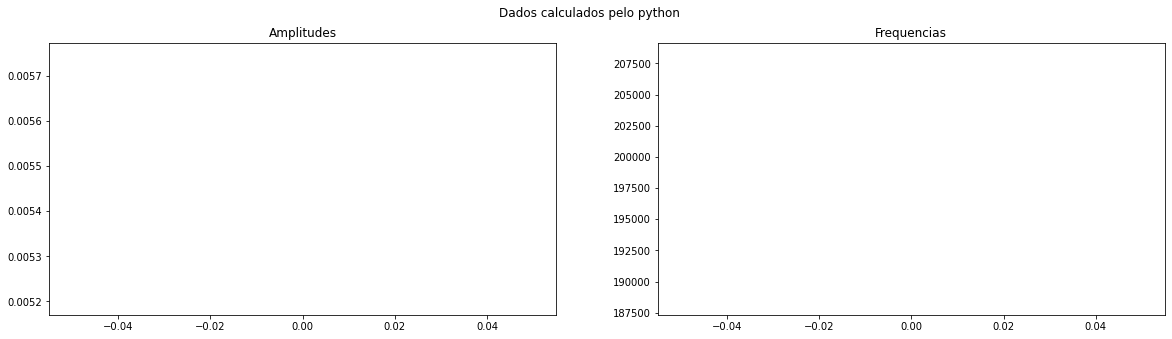

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python')
plt.show()

In [63]:
frequencia = 198190
amplitudes=np.zeros(dados.shape[0])
freqs=np.zeros(dados.shape[0])
nframes=25
nframes=dados.shape[0]
x = range(dados.shape[0])
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-50,frequencia+60,10)
    sample_freq = 600000
    npontos2 = 6000
    componentes2 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]
    #amplitudes[idx] = np.max(componentes2)
    frequencia = frequencia_range2[np.argmax(componentes2)]
    frequencia_range3 = range(frequencia-10,frequencia+11,1)
    componentes3 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range3]
    amplitudes[idx] = np.max(componentes3)
    frequencia = frequencia_range3[np.argmax(componentes3)]
    freqs[idx] = frequencia

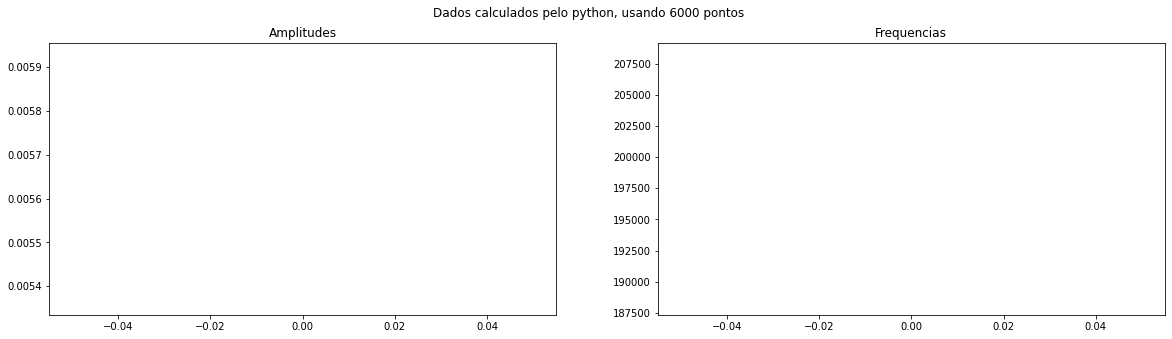

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 6000 pontos')
plt.show()

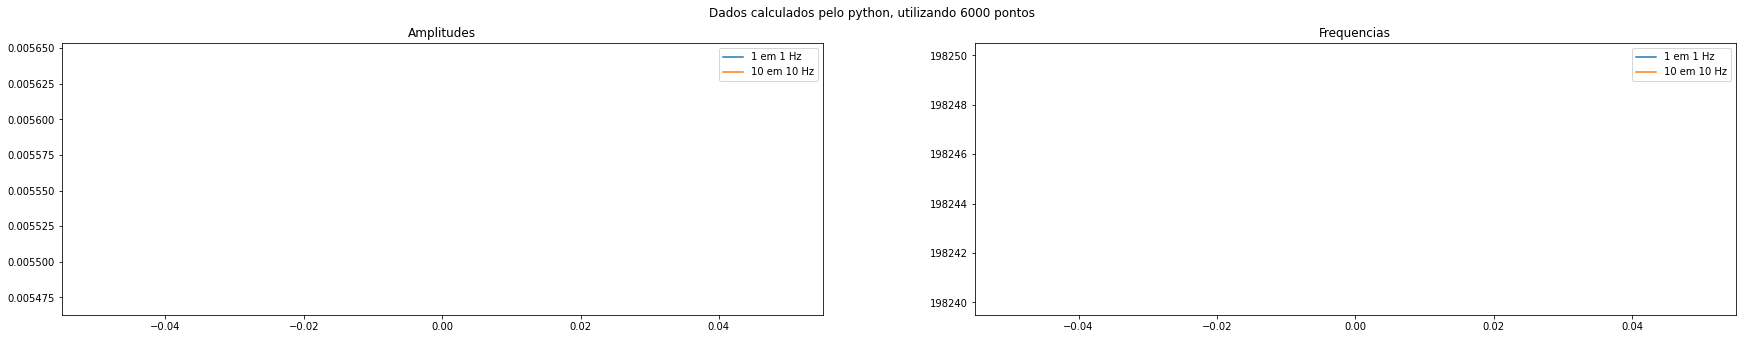

In [65]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.plot(amplitudes[:nframes],label="1 em 1 Hz")
plt.plot(amplitudes10[:nframes],label="10 em 10 Hz")
plt.title('Amplitudes')
plt.legend()
plt.subplot(1,2,2)
plt.plot(freqs[:nframes],label="1 em 1 Hz")
plt.plot(freqs10[:nframes],label="10 em 10 Hz")
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.legend()
plt.suptitle('Dados calculados pelo python, utilizando 6000 pontos')
plt.show()

In [66]:
frequencia = 198190
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=25
nframes=dados.shape[0]
x = range(dados.shape[0])
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-50,frequencia+60,10)
    sample_freq = 600000
    npontos2 = 600
    componentes2 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    frequencia = frequencia_range2[np.argmax(componentes2)]
    freqs10[idx] = frequencia
    

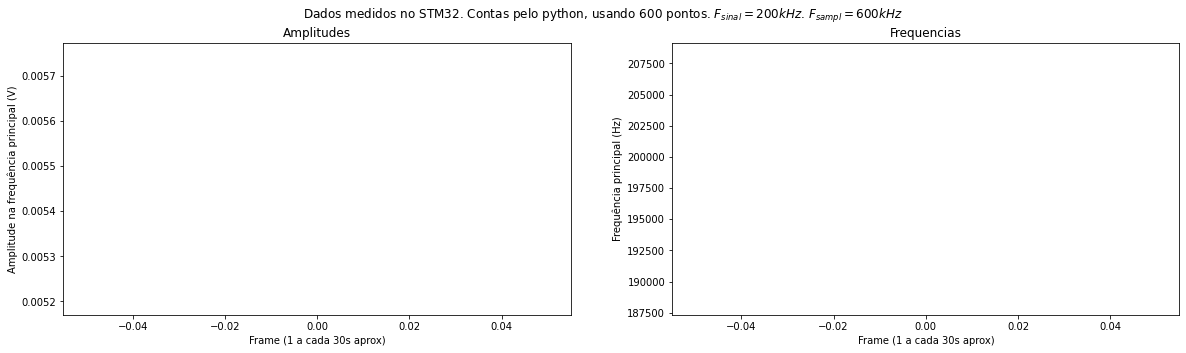

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.xlabel('Frame (1 a cada 30s aprox)')
plt.ylabel('Amplitude na frequência principal (V)')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.xlabel('Frame (1 a cada 30s aprox)')
plt.ylabel('Frequência principal (Hz)')
plt.suptitle(r'Dados medidos no STM32. Contas pelo python, usando 600 pontos. $F_{sinal}=200kHz$. $F_{sampl}=600kHz$')
plt.show()